In [70]:
import json
import random
import os
from PIL import Image, ImageOps
from itertools import product
from tqdm import tqdm
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

In [102]:
images_dir = 'Egypt/'

def render_img(img_paths):
    images = [Image.open(images_dir + x + '.png').convert('L') for x in img_paths]
    
    h = 64
    resized_images = []
    for img in images:
        
        # w = int(h / img.size[1] * img.size[0])
        # img = img.resize((w, h))
        # img = ImageOps.pad(img, (64, 64), color=255)
        img = ImageOps.expand(img, border=5, fill=255)
        resized_images.append(img)
    images = resized_images
    
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('L', (total_width, max_height), 255)

    x_offset = 0
    for im in images:
        y_offset = (max_height - im.size[1]) // 2
        new_im.paste(im, (x_offset, y_offset))
        x_offset += im.size[0]
    return new_im

In [7]:
train_set = json.load(open('../data/expr_train.json'))
test_set = json.load(open('../data/expr_train.json'))

In [106]:
train_exprs = list(set([(x['expr'], x['res']) for x in train_set if len(x['expr']) <= 20]))
test_exprs = list(set([(x['expr'], x['res']) for x in test_set]))

In [108]:
Operators = set(['+', '-', '*', '/', '(', ')', '^'])  # collection of Operators
Priority = {'+':1, '-':1, '*':2, '/':2, '^':3} # dictionary having priorities of Operators
def infixToPostfix(expression): 
    stack = [] # initialization of empty stack
    output = '' 
    for character in expression:

        if character not in Operators:  # if an operand append in postfix expression

            output+= character

        elif character=='(':  # else Operators push onto stack

            stack.append('(')

        elif character==')':

            while stack and stack[-1]!= '(':

                output+=stack.pop()

            stack.pop()

        else: 

            while stack and stack[-1]!='(' and Priority[character]<=Priority[stack[-1]]:

                output+=stack.pop()

            stack.append(character)

    while stack:

        output+=stack.pop()

    return output

In [109]:
train_samples = random.sample(train_exprs, 1000)
test_samples = random.sample(test_exprs, 100)

In [110]:
def numberToBase(n, b):
    if n == 0:
        return [0]
    digits = []
    while n:
        digits.append(int(n % b))
        n //= b
    return digits[::-1]

In [111]:
num_list = list(map(str, range(0, 10)))
op_list = ['+', '-', '*', '/']
lps = '('
rps = ')'
symbols = num_list + op_list + [lps, rps]

In [112]:
base = 9
dataset = {'train': [], 'test': []}
for split in ['train', 'test']:
    samples = train_samples if split == 'train' else test_samples
    for i, sample in enumerate(tqdm(samples)):
        infix, res = sample
        postfix = infixToPostfix(infix)
        postfix = [str(symbols.index(x) + 1) for x in postfix]
        res = ''.join(map(str, numberToBase(res, base)))
        expr_img = render_img(postfix)
        # display(expr_img)
        # input()
        file_name = f'{split}_{i:08d}.jpg'
        expr_img.save('../docs/rebuttal/images/' + file_name)
        dataset[split].append(['rebuttal/images/' + file_name, res if split == 'train' else '?'])
json.dump(dataset, open('../docs/rebuttal/data.json', 'w'))

100%|███████████████████████████████████████| 100/100 [00:00<00:00, 1079.88it/s]


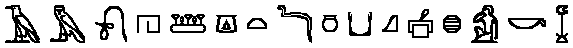

0     1     2     3     4     5     6     7     8     9     +     -     *     /     (     )


In [125]:
display(render_img([str(symbols.index(x) + 1) for x in symbols]))
print('     '.join(symbols))


In [127]:
infixToPostfix(infix)

'7529/2*/+'